### Problem 1

Given the iris data set, use the last two features "penal length" and "penal width" to predict the "species". Build a logistic regression and:

- (1) Print out the accuracy
- (2) Make a prediction given a new observation $\text{penal length} = 7$, $\text{penal width}=4$, as well as the probabilities $p(y=i|x)$.
- (3) Plot the linear boundaries, and compare it with the LDA's boundary.

0.96
[2]
[[9.01841863e-29 1.00144255e-08 9.99999990e-01]]


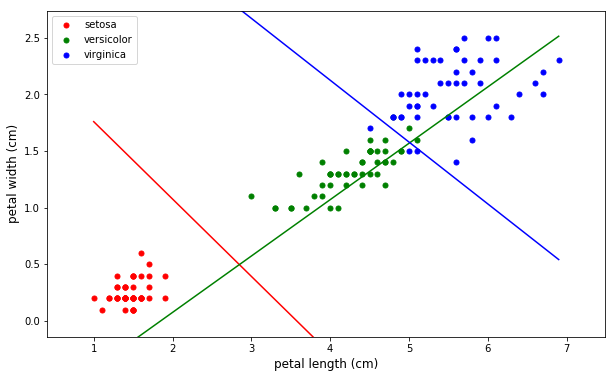

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data if you haven't done so

from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:, pair]
iris_y = iris.target

from sklearn import linear_model
logr = linear_model.LogisticRegression(C=1e4)

#### Your code here

logr.fit(iris_x, iris_y)
print(logr.score(iris_x, iris_y))

x_new = pd.DataFrame([4, 7]).values.reshape(1, -1)
print(logr.predict(x_new))
print(logr.predict_proba(x_new))




def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r", "g", "b", "m", "c", "k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])
    
    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([
        min(x[:,0]) - del_0, max(x[:,0]) + del_0,
        min(x[:,1]) - del_1, max(x[:,1]) + del_1]
    )

def logistic_model_2Dplot(x, model):
    # import warnings
    # warnings.warn('Does not work for all problems. (Works only for binary label?)')
    
    def plot_y(x_1, model=model):
        ## np.column_stack() combines intercept with coefficents
        for coef in np.column_stack((model.intercept_, model.coef_)):
            ## take b0, b1, b2 for one boundary at a time 
            b_0, b_1, b_2 = coef[:3]
            # given 1, calculate corresponding x2
            # http://python-future.org/compatible_idioms.html
            # Idiomatic Py3, but inefficient on Py2
            yield list(map(lambda x: -(b_0 + b_1*x) / b_2, x_1))
    
    x = np.array(x)
    x_a = [min(x[:,0]), max(x[:,0])]
    col = ["r", "g", "b", "m", "c", "k"]
    for i, x_b in enumerate(plot_y(x_a, model)):
        plt.plot(x_a, x_b, c=col[i])

def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

## Plotting
plt.figure(figsize=(10, 6))
data_2Dplot(iris_x, iris_y, xlabel=xlabel, ylabel=ylabel, legends=iris.target_names)
logistic_model_2Dplot(iris_x, logr)
plt.show()

### Problem 2

There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". You need to write a report which contains:

- (1) The features you are using to build the model.
- (2) At least two models we have learned.
- (3) After building the models, report the corresponding accuracy on the training set.
- (4) Use you models to make prediction on the "spam_test.csv" file, report the corresponding accuracy on this test set.
- (5) Compare the performance of the models in the following two aspect:
    - (a) the performance of two different models.
    - (b) the performance of one model on the training set and test set.
    
The following codes may be a useful beginning:

In [19]:
import pandas as pd
import numpy as np
train = pd.read_csv('data/spam_train.csv')
test = pd.read_csv('data/spam_test.csv')
## separate the predictors and response in the training data set
x = np.array(train.iloc[:, 0:57])
y = np.ravel(train.iloc[:, -1])
## separate the predictors and response in the test data set
x2 = np.array(test.iloc[:, 0:57])
y2 = np.ravel(test.iloc[:, -1])

## have a look at the training data set
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [ ]:
### your solution